In [ ]:
# Requirements
# -pandas
# -matplotlib
# -sklearn
# -lime
# -shap
# pip install <lib>

# Loading
- Gait in Neurodegenerative Disease Database
- https://physionet.org/content/gaitndd/1.0.0/

In [1]:
import pandas as pd


folder = "/home/sarai/Documents/NDD/gait-in-neurodegenerative-disease-database-1.0.0/"
headers = [
    "Elapsed Time (sec)",
    "Left Stride Interval (sec)",
    "Right Stride Interval (sec)",
    "Left Swing Interval (sec)",
    "Right Swing Interval (sec)",
    "Left Swing Interval (% of stride)",
    "Right Swing Interval (% of stride)",
    "Left Stance Interval (sec)",
    "Right Stance Interval (sec)",
    "Left Stance Interval (% of stride)",
    "Right Stance Interval (% of stride)",
    "Double Support Interval (sec)",
    "Double Support Interval (% of stride)"
]

class_dicts = {
    "park": 0,
    "hunt": 1,
    "control": 2, 
    "als": 4,
}


with open(f"{folder}/RECORDS") as f:
    records = f.readlines()
    records = [record.rstrip() for record in records]

dataframes = []
for record in records:
    data = pd.read_csv(f"{folder}/{record}.ts", sep="	", header=None)
    data.columns = headers
    data['Label'] = record
    data['Class'] = [class_dicts[key] for key in class_dicts.keys() if key in record][0]
    dataframes.append(data)
    
df = pd.concat(dataframes)

In [2]:
df

Elapsed Time (sec)  Left Stride Interval (sec)  \
0               22.3200                      1.2833   
1               23.6433                      1.3233   
2               24.9467                      1.3033   
3               26.3633                      1.4167   
4               27.6000                      1.2367   
..                  ...                         ...   
217            294.2700                      1.2467   
218            295.4800                      1.2100   
219            296.6933                      1.2133   
220            297.9233                      1.2300   
221            299.1867                      1.2633   

     Right Stride Interval (sec)  Left Swing Interval (sec)  \
0                         1.3533                     0.4067   
1                         1.2667                     0.4833   
2                         1.3600                     0.4500   
3                         1.2833                     0.5033   
4                         1.4067                     0.3467   
..                           ...                        ...   
217                       1.2400                     0.4600   
218                       1.2267                     0.4533   
219                       1.2067                     0.4533   
220                       1.2233                     0.4600   
221                       1.2533                     0.4700   

     Right Swing Interval (sec)  Left Swing Interval (% of stride)  \
0                        0.4133                              31.69   
1                        0.4000                              36.52   
2                        0.4267                              34.53   
3                        0.3667                              35.53   
4                        0.3567                              28.03   
..                          ...                                ...   
217                      0.4500                              36.90   
218                      0.4300                              37.47   
219                      0.4333                              37.36   
220                      0.4333                              37.40   
221                      0.4500                              37.20   

     Right Swing Interval (% of stride)  Left Stance Interval (sec)  \
0                                 30.54                      0.8767   
1                                 31.58                      0.8400   
2                                 31.37                      0.8533   
3                                 28.57                      0.9133   
4                                 25.36                      0.8900   
..                                  ...                         ...   
217                               36.29                      0.7867   
218                               35.05                      0.7567   
219                               35.91                      0.7600   
220                               35.42                      0.7700   
221                               35.90                      0.7933   

     Right Stance Interval (sec)  Left Stance Interval (% of stride)  \
0                         0.9400                               68.31   
1                         0.8667                               63.48   
2                         0.9333                               65.47   
3                         0.9167                               64.47   
4                         1.0500                               71.97   
..                           ...                                 ...   
217                       0.7900                               63.10   
218                       0.7967                               62.53   
219                       0.7733                               62.64   
220                       0.7900                               62.60   
221                       0.8033                               62.80   

     Right Stance Interval (

![](https://ars.els-cdn.com/content/image/1-s2.0-S1877132720300397-gr1.jpg)

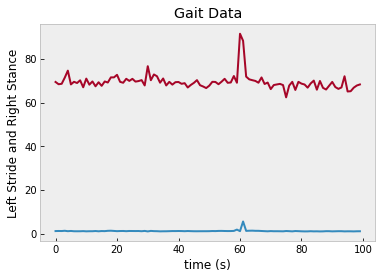

In [5]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

fig, ax = plt.subplots()
ax.plot(
    df.index[:100], df["Left Stride Interval (sec)"][:100], 
    df.index[:100], df["Right Stance Interval (% of stride)"][:100])
ax.set(xlabel='time (s)', ylabel='Left Stride and Right Stance',
       title='Gait Data')
ax.grid()

## Select and normalize features

In [3]:
from sklearn.preprocessing import StandardScaler

BEST_FEATURES = [
    "Left Swing Interval (sec)",
    "Double Support Interval (% of stride)",
    "Left Swing Interval (% of stride)",
    "Left Stance Interval (% of stride)",
    "Right Stance Interval (% of stride)",
    "Right Swing Interval (% of stride)",
    "Elapsed Time (sec)",
    "Class"
]

# Control vs ALS
small_df_2 = df[df['Class'] == 2]
small_df_4 = df[df['Class'] == 4]
small_df = pd.concat([small_df_2, small_df_4])
small_df = small_df[BEST_FEATURES]


sc = StandardScaler()
small_df_normalized = sc.fit_transform(small_df)
small_df_normalized = pd.DataFrame(small_df_normalized, columns=BEST_FEATURES)
small_df_normalized['Class'] = list(small_df['Class'].astype('int64'))

In [4]:
small_df_normalized.head()

Left Swing Interval (sec)  Double Support Interval (% of stride)  \
0                  -0.166248                              -0.179331   
1                  -0.097978                              -0.296196   
2                  -0.166248                              -0.308670   
3                  -0.132113                              -0.127464   
4                  -0.188777                              -0.362507   

   Left Swing Interval (% of stride)  Left Stance Interval (% of stride)  \
0                          -0.209082                            0.209082   
1                           0.128187                           -0.128187   
2                          -0.029389                            0.029389   
3                           0.205593                           -0.205593   
4                           0.072897                           -0.072897   

   Right Stance Interval (% of stride)  Right Swing Interval (% of stride)  \
0                            -0.535675                            0.535675   
1                            -0.768875                            0.768875   
2                            -0.588145                            0.588145   
3                             0.102711                           -0.102711   
4                            -0.739725                            0.739725   

   Elapsed Time (sec)  Class  
0           -1.709932      2  
1           -1.696358      2  
2           -1.683285      2  
3           -1.670169      2  
4           -1.657470      2

## SVM Classifier

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

features = small_df_normalized.drop(['Class'], axis=1).values
labels = small_df_normalized['Class'].values
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.4, random_state=0
)

clf = SVC(C=1000, gamma=0.001, kernel='rbf', probability=True)
clf.fit(X_train, y_train)

scores = cross_val_score(clf, X_test, y_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_test, y_test, scoring='precision_micro')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_test, y_test, scoring='recall_micro')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.03)
Precision: 0.89 (+/- 0.03)
Recall: 0.89 (+/- 0.03)


## Partial Dependence Plot (PDP)
- Model-Agnostic Method
- Shows the marginal effect one or two features have on the predicted outcome of a machine learning model
- Assume that the target features are independent from the complement features
- Can show whether the relationship between the target and a feature is linear, monotonic or more complex.
- (https://scikit-learn.org/stable/modules/partial_dependence.html)
- (https://towardsdatascience.com/prettifying-partial-density-plots-in-python-1f7216937ff)


CPU times: user 1min 36s, sys: 6.3 ms, total: 1min 36s
Wall time: 1min 36s


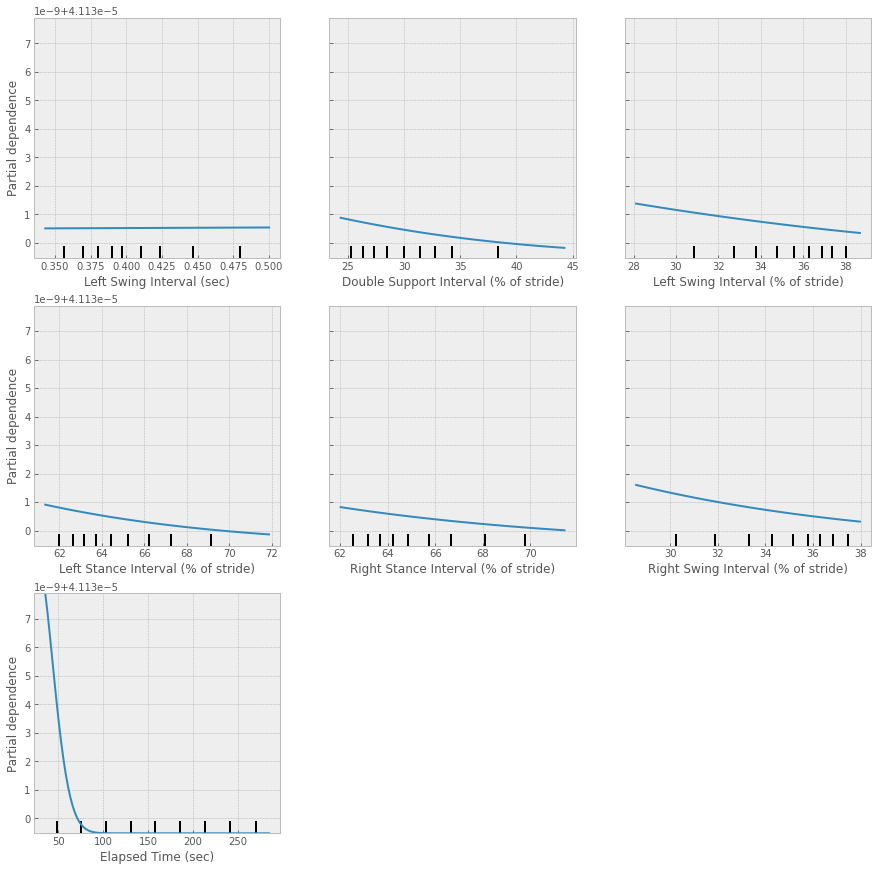

In [245]:
%%time
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

x = small_df.drop(['Class'], axis=1)
features = [0, 1, 2, 3, 4, 5, 6]

fig, ax1 = plt.subplots(figsize=(15, 15))
plot_partial_dependence(clf, x, features, ax=ax1)

In [109]:
import numpy as np
from sklearn.inspection import partial_dependence

"""
Source: https://towardsdatascience.com/prettifying-partial-density-plots-in-python-1f7216937ff
"""


def plot_pdp(model, X, feature, target=False, return_pd=False, y_pct=False, figsize=(8,7), norm_hist=True, dec=.5):
    # Get partial dependence
    pardep = partial_dependence(model, X, [feature])
    
    # Get min & max values
    xmin = pardep[1][0].min()
    xmax = pardep[1][0].max()
    ymin = pardep[0][0].min()
    ymax = pardep[0][0].max()
    
    # Create figure
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.grid(alpha=.5, linewidth=1)
    
    # Plot partial dependence
    color = 'tab:blue'
    ax1.plot(pardep[1][0], pardep[0][0], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xlabel(feature, fontsize=14)
    
    tar_ylabel = ': {}'.format(target) if target else ''
    ax1.set_ylabel('Partial Dependence{}'.format(tar_ylabel), color=color, fontsize=14)
    
    tar_title = target if target else 'Target Variable'
    ax1.set_title('Relationship Between {} and {}'.format(feature, tar_title), fontsize=16)
    
    if y_pct and ymin>=0 and ymax<=1:
        # Display yticks on ax1 as percentages
        fig.canvas.draw()
        labels = [item.get_text() for item in ax1.get_yticklabels()]
        labels = [int(np.float(label)*100) for label in labels]
        labels = ['{}%'.format(label) for label in labels]
        ax1.set_yticklabels(labels)
    
    # Plot line for decision boundary
    ax1.hlines(dec, xmin=xmin, xmax=xmax, color='black', linewidth=2, linestyle='--', label='Decision Boundary')
    ax1.legend()

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.hist(X[feature], bins=80, range=(xmin, xmax), alpha=.25, color=color, density=norm_hist)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylabel('Distribution', color=color, fontsize=14)
    
    if y_pct and norm_hist:
        # Display yticks on ax2 as percentages
        fig.canvas.draw()
        labels = [item.get_text() for item in ax2.get_yticklabels()]
        labels = [int(np.float(label)*100) for label in labels]
        labels = ['{}%'.format(label) for label in labels]
        ax2.set_yticklabels(labels)

    plt.show()
    
    if return_pd:
        return pardep

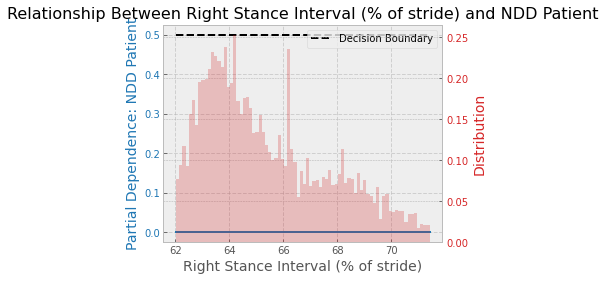

In [246]:
plot_pdp(clf, x, "Right Stance Interval (% of stride)", target='NDD Patient')
# plot_pdp(clf, x, "Left Swing Interval (sec)", target='NDD Patient')
# plot_pdp(clf, x, "Double Support Interval (% of stride)", target='NDD Patient')
# plot_pdp(clf, x, "Left Swing Interval (% of stride)", target='NDD Patient')
# plot_pdp(clf, x, "Left Stance Interval (% of stride)", target='NDD Patient')
# plot_pdp(clf, x, "Right Stance Interval (% of stride)", target='NDD Patient')
# plot_pdp(clf, x, "Right Swing Interval (% of stride)", target='NDD Patient')
# plot_pdp(clf, x, "Elapsed Time (sec)", target='Class')

## LIME 
- Local Interpretable Model-agnostic Explanations
- Builds sparse linear models around each prediction to explain how the black box model works in that local vicinity
- https://homes.cs.washington.edu/~marcotcr/

In [9]:
i = 17
inv_map = {v: k for k, v in class_dicts.items()}

print("Explaining this Input: ", X_test[i])
print("Output: ", y_test[i], "Group: ", inv_map[y_test[i]])

Explaining this Input:  [-0.04097318 -0.34346689  0.74190642 -0.74190642 -0.32579462  0.32579462
  0.9504385 ]
Output:  2 Group:  control


In [10]:
import lime
import lime.lime_tabular

features = list(small_df_normalized.drop(['Class'], axis=1).columns)
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,  
    mode='classification',
    training_labels=y_train,
    feature_names=features)


# asking for explanation for LIME model
exp = explainer.explain_instance(X_test[i], clf.predict_proba, num_features=len(X_test[i]))
exp.show_in_notebook(show_table=True, show_all=False)

- Note that the row we are explained is displayed on the table format
- The value column displays the original value for each feature.
- Only the features used in the explanation are displayed

In [12]:
index = df.columns.get_loc("Left Swing Interval (sec)")

In [13]:
temp = X_test[i].copy()

print('P(Left Swing) before:', clf.predict_proba(temp.reshape(1,-1))[0,0])
temp[index] += .5
print('P(Left Swing) +.5:', clf.predict_proba(temp.reshape(1,-1))[0,0])
temp[index] += .5
print('P(Left Swing) +1:', clf.predict_proba(temp.reshape(1,-1))[0,0])

temp = X_test[i].copy()
temp[index] -= .5
print('P(Left Swing) -.5:', clf.predict_proba(temp.reshape(1,-1))[0,0])
temp[index] -= .5
print('P(Left Swing) -1:', clf.predict_proba(temp.reshape(1,-1))[0,0])

P(Left Swing) before: 0.9787160809605133
P(Left Swing) +.5: 0.9510980034369717
P(Left Swing) +1: 0.8998324716497218
P(Left Swing) -.5: 0.9910542001209526
P(Left Swing) -1: 0.9963444232207838


In [14]:
i = 4
inv_map = {v: k for k, v in class_dicts.items()}

print("Explaining this Input: ", X_test[i])
print("Output: ", y_test[i], "Group: ", inv_map[y_test[i]])

exp2 = explainer.explain_instance(X_test[i], clf.predict_proba, num_features=len(X_test[i]))
exp2.show_in_notebook(show_table=True, show_all=False)

Explaining this Input:  [ 0.03856097  0.44635656 -2.20228734  2.20228734  0.30967631 -0.30967631
 -0.5412167 ]
Output:  4 Group:  als


In [15]:
i = 12
inv_map = {v: k for k, v in class_dicts.items()}

print("Explaining this Input: ", X_test[i])
print("Output: ", y_test[i], "Group: ", inv_map[y_test[i]])

exp2 = explainer.explain_instance(X_test[i], clf.predict_proba, num_features=len(X_test[i]))
exp2.show_in_notebook(show_table=True, show_all=False)

Explaining this Input:  [ 0.00442614 -0.13008981  0.2249447  -0.2249447  -0.14506436  0.14506436
 -1.45677754]
Output:  4 Group:  als


## Shap 
- SHapley Additive exPlanation
- red: positive impacts on the prediction
- blue: negative impacts on the prediction

In [7]:
%%time
import shap
import warnings

shap.initjs()

X_train = pd.DataFrame(X_train, columns=small_df_normalized.drop(['Class'], axis=1).columns)
X_test = pd.DataFrame(X_test, columns=small_df_normalized.drop(['Class'], axis=1).columns)

# use Kernel SHAP to explain test set predictions
explainer_shap = shap.KernelExplainer(clf.predict_proba, X_train[:10], link="logit")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer_shap.shap_values(X_test, nsamples=100)


CPU times: user 15min 5s, sys: 11min 30s, total: 26min 36s
Wall time: 4min 38s


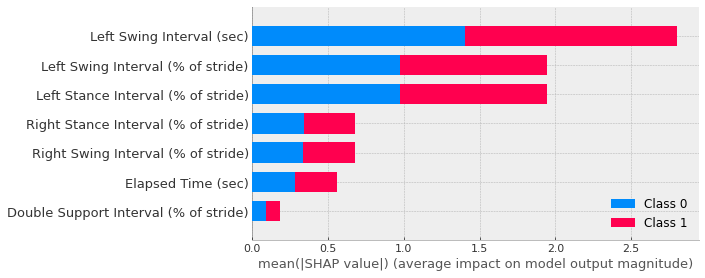

In [203]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

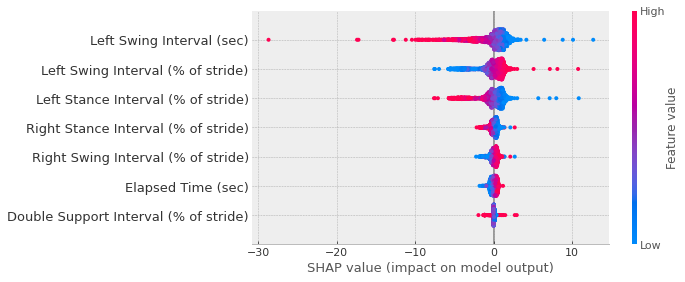

In [202]:
shap.summary_plot(shap_values[0],
                  X_test,
                  plot_type='dot')

# Each instance the given explanation is represented by a single dot on each feature row. 
# The x position of the dot is determined by the SHAP value (shap_values.value[instance,feature]) 
# of that feature, and dots "pile up" along each feature row to show density. 
# Color is used to display the original value of a feature

In [8]:
# plot the SHAP values for the output of the first instance
shap.force_plot(
    explainer_shap.expected_value[0], 
    shap_values[0][0,:], 
    pd.DataFrame(X_test).iloc[0,:], 
    link="logit"
)

# - red: positive impacts on the prediction
# - blue: negative impacts on the prediction
# The base value is the average of all output values of the model on the training

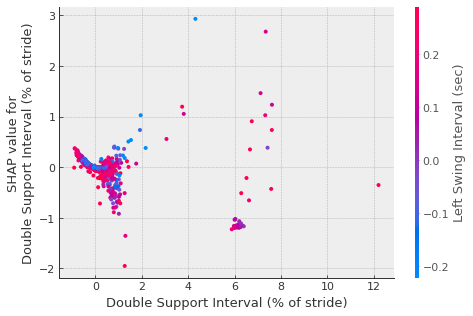

In [232]:
shap.dependence_plot("Double Support Interval (% of stride)", shap_values=shap_values[0], features=X_test)

# shows the effect a single feature has on the predictions made by the model.
# Each dot is a single prediction (row) from the dataset.
# The x-axis is the value of the feature (from the X matrix).
# The y-axis is the SHAP value for that feature, which represents how much knowing that feature's value changes the output of the model for that sample's prediction. For this model the units are log-odds of making over 50k annually.
# The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically).

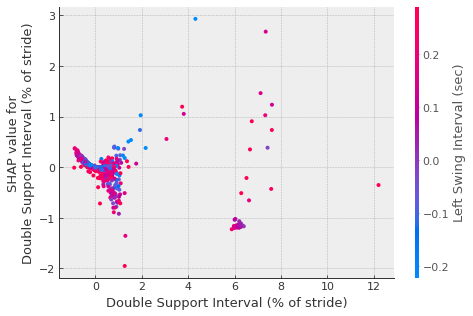

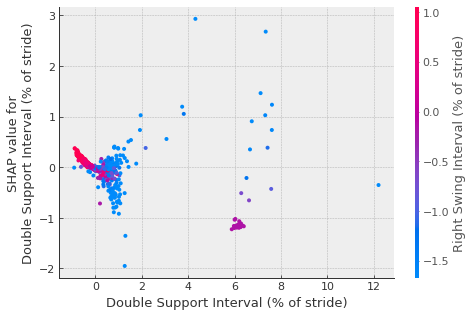

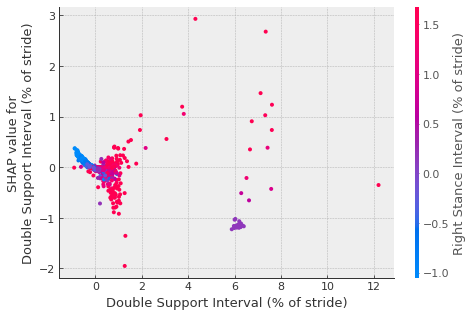

In [234]:
inds = shap.approximate_interactions("Double Support Interval (% of stride)", shap_values[0], X_test)

# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot(
        "Double Support Interval (% of stride)", shap_values[0], X_test, interaction_index=inds[i])

## Counterfactual explanations
- https://github.com/interpretml/DiCE
- https://github.com/andreArtelt/ceml